# Setup

In [74]:
import json
from geopy.distance import geodesic
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file = "../dane/data.txt"

# Ile autobusów przkroczylo prędkość 50km/h?


In [79]:
class BusesStatistics():
    def __init__(self, data_file):
        self.data_file = data_file

        # Zbior najswierzszych danych autobusu
        self.buses_data = {}
        
        # Jakie busy przekroczyly 50 km/h
        self.fast_buses = set()

        # Wszystkie zmierzone predkosci (wielokrotnie dla tych samych autobusow)
        self.measured_speeds = []

        with open(data_file, 'r') as f:
            for line in tqdm(f):
                dct = json.loads(line)
                self._update_buses_data(dct)
                continue
                
                if dct["result"] == "B\u0142\u0119dna metoda lub parametry wywo\u0142ania":
                    continue
                for bus_info in dct["result"]:
                    self._update_buses_data(bus_info)

    def get_fast_buses(self):
        return self.fast_buses
        
    def get_measured_speeds(self):
        return self.measured_speeds


    def _time_diff(self, timestamp1, timestamp2):
        dt1 = datetime.strptime(timestamp1, "%Y-%m-%d %H:%M:%S")
        dt2 = datetime.strptime(timestamp2, "%Y-%m-%d %H:%M:%S")

        time_difference = dt2 - dt1
        difference_in_hours = time_difference.total_seconds() / 3600
        return difference_in_hours

    def _update_buses_data(self, bus_info: dict):
        bus_id     = bus_info["VehicleNumber"]
        time_stamp = bus_info["Time"]
        lon        = bus_info["Lon"]
        lat        = bus_info["Lat"]
    
        if bus_id not in self.buses_data:
            self.buses_data[bus_id] = {
                "bus_id": bus_id,
                "time": time_stamp,
                "cords": (lat, lon)
            }
            return
        if self.buses_data[bus_id]["time"] == time_stamp:
            return
    
        distance_in_km = geodesic(self.buses_data[bus_id]["cords"], (lat, lon)).kilometers
        time_in_hours  = self._time_diff(self.buses_data[bus_id]["time"], time_stamp)

        av_speed = distance_in_km / time_in_hours

        # Odrzucamy blędne pomiary, nie jest mozliwe zeby autobus jechal 100 w zabudowanym
        if av_speed < 100:
            self.measured_speeds.append(av_speed)
            if av_speed >= 50:
                self.fast_buses.add(bus_id)

        self.buses_data[bus_id]["time"]  = time_stamp
        self.buses_data[bus_id]["cords"] = (lat, lon)


In [80]:
stats = BusesStatistics(data_file)
df = pd.DataFrame({
    'Speed': stats.get_mesured_speeds(),
    '
})

487073it [00:29, 16253.43it/s]

1015


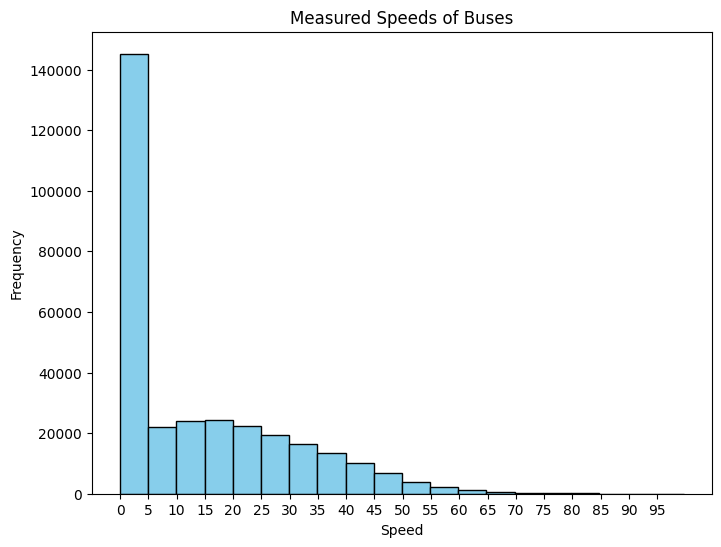

In [83]:
plt.figure(figsize=(8, 6))
plt.hist(stats.get_measured_speeds(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Measured Speeds of Buses')
plt.xticks(np.arange(0, 100, 5))
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
theta = np.linspace(0, 2*np.pi, len(df), endpoint=False)
radii = df['Speed']
width = np.pi / len(df)

bars = plt.bar(theta, radii, width=width, color='skyblue', edgecolor='black')

plt.title('Circular Chart of Measured Speeds of Buses')
plt.show()